### Loading our data

In [1]:
import os
import sys
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)
sys.path.append(project_root)
import importlib
import src.plots 
import src.utils
importlib.reload(src.plots)



/opt/anaconda3/envs/qattan/lib/python3.10/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/qattan/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <0B7EB158-53DC-3403-8A49-22178CAB4612> /opt/anaconda3/envs/qattan/lib/python3.10/site-packages/torchvision/image.so
  Reason: tried: '/opt/anaconda3/envs/qattan/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/qattan/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/qattan/lib/python3.10/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/qattan/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` 

<module 'src.plots' from '/Users/mac/Studying/Machine learning/Digit_recognition_evolution/linear_classifiers/src/plots.py'>

In [2]:

from src.utils import load_transform_split_mnist , count_classes , check_device
from src.plots import  show_samples

train_loader,val_loader,test_loader , train_size,val_size, test_size = load_transform_split_mnist(classes=None)

### showing some samples

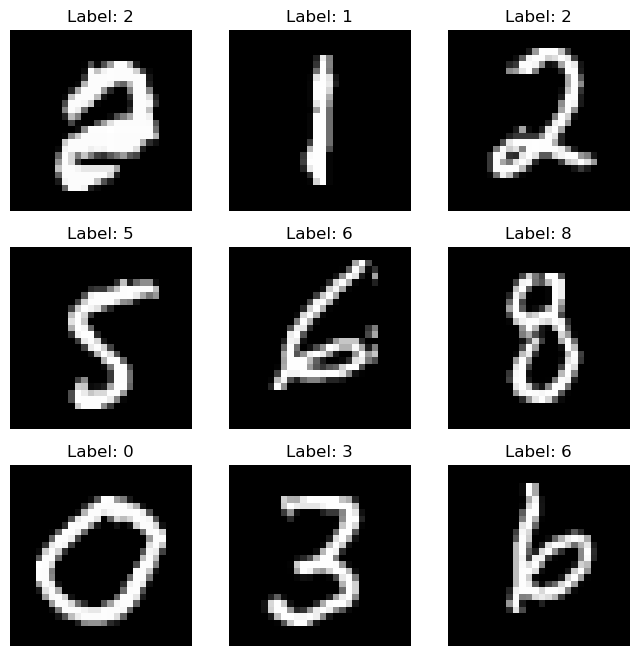

In [3]:
importlib.reload(src.plots)
show_samples(train_loader)

### Counting Classes

In [4]:
# first we check on our device for function necessties
check_device()

from importlib import reload
import src.utils as utils

reload(utils)

counts = utils.count_classes(train_loader)
counts = {int(k): v for k, v in counts.items()}
print(counts)


Using Apple Silicon MPS GPU
Device: mps
{7: 5012, 4: 4674, 3: 4905, 1: 5394, 5: 4337, 2: 4766, 6: 4734, 9: 4759, 8: 4681, 0: 4738}


### checking data shape

In [5]:
images, labels = next(iter(train_loader))

print("="*50)
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
print("="*50)
print(images.min().item(), images.max().item())
print("="*50)
print("First 10 labels:", labels[:10].tolist())

Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])
0.0 1.0
First 10 labels: [6, 8, 4, 7, 7, 9, 6, 0, 1, 9]


## NOW WE TRAIN!!

Training Softmax Regression on MNIST...
############################################################
Epoch 1/50 | Loss: 0.5044 | Acc: 87.32%
Epoch 2/50 | Loss: 0.3476 | Acc: 90.35%
Epoch 3/50 | Loss: 0.3220 | Acc: 90.95%
Epoch 4/50 | Loss: 0.3083 | Acc: 91.41%
Epoch 5/50 | Loss: 0.2998 | Acc: 91.65%
Epoch 6/50 | Loss: 0.2933 | Acc: 91.85%
Epoch 7/50 | Loss: 0.2889 | Acc: 91.90%
Epoch 8/50 | Loss: 0.2845 | Acc: 92.06%
Epoch 9/50 | Loss: 0.2813 | Acc: 92.12%
Epoch 10/50 | Loss: 0.2786 | Acc: 92.25%
Epoch 11/50 | Loss: 0.2761 | Acc: 92.30%
Epoch 12/50 | Loss: 0.2740 | Acc: 92.37%
Epoch 13/50 | Loss: 0.2722 | Acc: 92.39%
Epoch 14/50 | Loss: 0.2705 | Acc: 92.44%
Epoch 15/50 | Loss: 0.2691 | Acc: 92.54%
Epoch 16/50 | Loss: 0.2675 | Acc: 92.54%
Epoch 17/50 | Loss: 0.2663 | Acc: 92.61%
Epoch 18/50 | Loss: 0.2650 | Acc: 92.67%
Epoch 19/50 | Loss: 0.2642 | Acc: 92.66%
Epoch 20/50 | Loss: 0.2631 | Acc: 92.62%
Epoch 21/50 | Loss: 0.2619 | Acc: 92.73%
Epoch 22/50 | Loss: 0.2611 | Acc: 92.73%
Epoch 

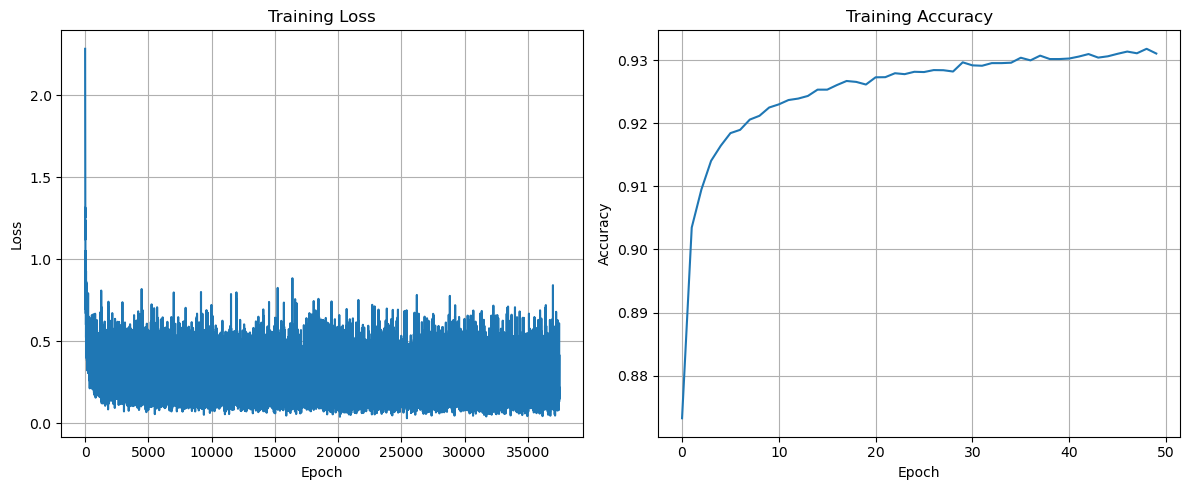

In [6]:
from src.softmax_regression_scratch import SoftmaxRegressionScratch
from src.plots import plot_loss_and_accuracy


# Initializign the Model
input_dim = 28 * 28  
num_classes = 10
lr = 0.1
epochs = 50

model = SoftmaxRegressionScratch(input_dim, num_classes, lr)

print("Training Softmax Regression on MNIST...")
print("#" * 60)

model.fit(train_loader, epochs)

print("Training complete!")

print("#" * 60)

# Plotting loss and accuracy
plot_loss_and_accuracy(model)


### Evaluating

In [7]:
from src.utils import evaluate_softmax
# Validation evaluation
val_loss, val_acc = evaluate_softmax(model,val_loader)
print(f"\nValidation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%")



Validation Loss: 0.2799, Validation Accuracy: 92.19%


### Testing

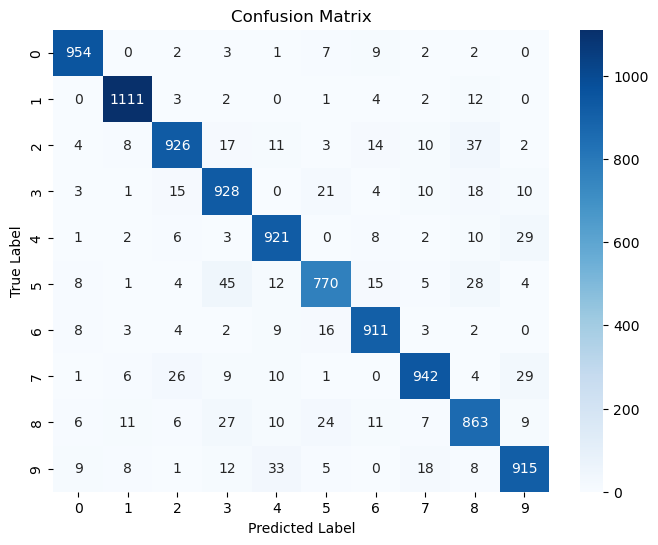

   Class  Accuracy
0      0  0.973469
1      1  0.978855
2      2  0.897287
3      3  0.918812
4      4  0.937882
5      5  0.863229
6      6  0.950939
7      7  0.916342
8      8  0.886037
9      9  0.906838


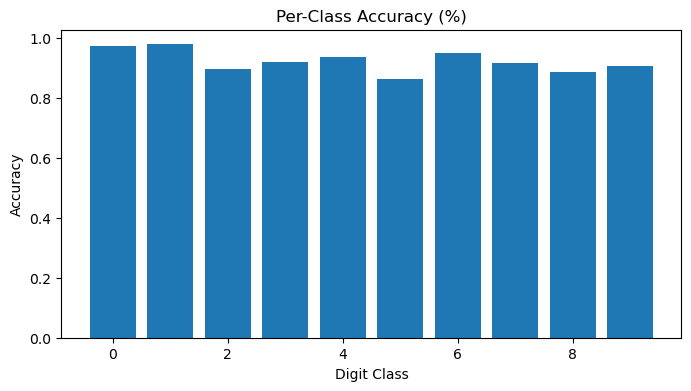

In [12]:
import torch

import src.plots as plots
from importlib import reload
reload(plots)
from src.utils import per_class_accuracy


# Test evaluation
y_test = []
y_pred_test = []

with torch.no_grad():
    for X, y in test_loader:
        preds = model.predict(X)
        y_test.extend(y.numpy())
        y_pred_test.extend(preds.numpy())
cm = plots.plot_confusion_matrix(y_test, y_pred_test)
df_acc = per_class_accuracy(cm)
plots.plot_per_class_acc(df_acc)